# ETL - Merge all individual .csv files into 1 .csv file

Scraped data is stored as individual .csv files (1 per feature).  Here we concatenate/merge those files and save 1 file that can be loaded into GitHub and used for the rest of the project

### NOTES:

- National divorce rate is applied to each state.
- Home ownership there is more data on National (start 1976-2020) than on individual states (1984-2020).
- (++) Minimum wage: originally 54 states available. Dropped: 'Guam', 'Puerto Rico', 'U.S. Virgin Islands'
- (+++) Minimum wage:  removed year 1968 and 1969
- Minimum wage missing:   National.   used the average value from all other states.
- (++++) Average Wage Indexing: removed data ealier than 1970 (1951-1969).  Applied same data to all states.
- Poverty rate:  missing data for District of Columbia.  Removed data ealier than 1970 (1967-1969).

#### Summary of data

|Variable|Nbr of states|Year Start|Year End|
|:---|:---:|:---:|:---:|
|Population|52|1970|2026
|Education|52|1970|2026|
|Welfare|52|1970|2026|
|Crime|51+|1970|2019|
|Unemployment|52|1986|2019|
|Divorce|52|1960|2019|
|Home ownership|52|1984| 2020|
|Minimum Wage|51++|1970+++|2020|
|CPI - Consumer Price Index|51++|1970+++|2020|
|Inflation Rate|52|1970|2021|
|Average Wage Indexing|52|1970++++|2020|
|**Poverty Rate**|51|1967|2019|




In [1]:
# Import dependencies
import pandas as pd
import numpy as np

In [2]:
# Helper functions
import math
import matplotlib.pyplot as plt

# Generate boxplots for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def boxplots(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].boxplot(df[col].dropna())
            axs[j].set_title(col)
        else:
            axs[i][j].boxplot(df[col].dropna())
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

# Generate histograms with 20 bins for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def histograms(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].hist(df[col].dropna(), alpha=0.5, bins=20)
            axs[j].set_title(col)
        else:
            axs[i][j].hist(df[col].dropna(), alpha=0.5, bins=20)
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
    
def timeplots(df,xseries):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            temp_df = df[[xseries,col]].dropna()
            axs[j].plot(df[col])
            axs[j].set_title(col)
        else:
            axs[i][j].plot(df[col])
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
    
def qc_data(df):
    print('---  DTYPES  ---')
    print(df.dtypes)
    print('---  STATISTICS  ---')
    print(df.describe())
    print('---  TOTAL NAs  ---')
    print(df.isna().sum())
    print('---  YEARS COVERED  ---')
    print(f"Start: {df['year'].min()}")
    print(f"End: {df['year'].max()}")
    if 'state' in df.columns:
        print('---  LIST OF STATES  ---')
        print(f"Number states: {df['state'].value_counts().count()}")
        print(df['state'].value_counts(sort=True).sort_index())

## Start with welfare_education data

In [3]:
# Load welfare_education data
path = "../Raw_Data/"
filename = "welfare_education_1970-2026.csv"
path_filename = path + filename

welfare_df = pd.read_csv(path_filename, delimiter=",")
dataset_df = welfare_df.copy()
welfare_df

,year,state,population_million,education_million,welfare_million
0,1970,National,203.302,56456.0,18738.8
1,1971,National,205.515,63469.0,27364.3
2,1972,National,207.752,71351.0,30594.3
3,1973,National,210.013,75849.0,28944.9
4,1974,National,212.299,81440.0,34816.4
...,...,...,...,...,...
2959,2022,Wyoming,0.587,2759.1,347.9
2960,2023,Wyoming,0.589,2745.8,349.3
2961,2024,Wyoming,0.591,2755.2,351.3
2962,2025,Wyoming,0.594,2793.8,354.9


### Quality check data

In [4]:
# Use helper function
qc_data(dataset_df)

---  DTYPES  ---
year                    int64
state                  object
population_million    float64
education_million     float64
welfare_million       float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03
std      16.454726           37.865413       1.032112e+05     6.274371e+04
min    1970.000000            0.303000       1.199000e+02     1.280000e+01
25%    1984.000000            1.570750       1.931550e+03     5.900000e+02
50%    1998.000000            3.821500       4.919800e+03     1.313950e+03
75%    2012.000000            6.632750       1.372025e+04     3.561275e+03
max    2026.000000          343.192000       1.533802e+06     1.803767e+06
---  TOTAL NAs  ---
year                  0
state                 0
population_million    0
education_million     0
welfare

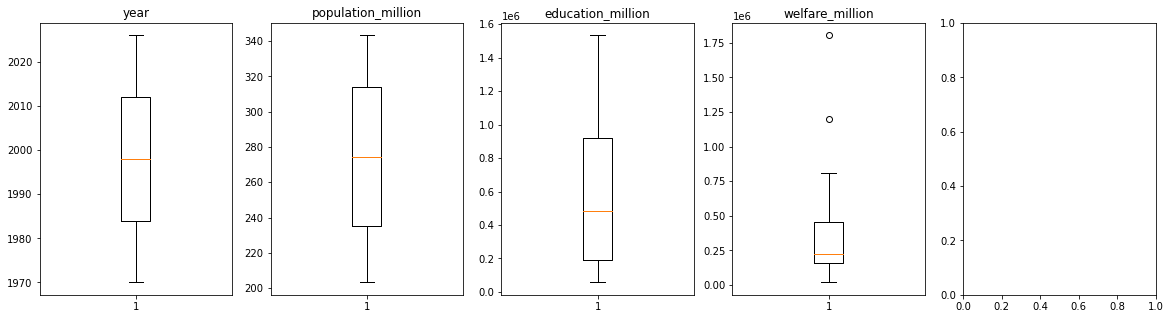

In [5]:
boxplots(dataset_df.loc[dataset_df['state']=='National'])

## Load and check crime_rate.csv

In [6]:
# Load crime data
path = "../Raw_Data/"
filename = "crime_rate.csv"
path_filename = path + filename

crime_df = pd.read_csv(path_filename, delimiter=",")
crime_df['year'] = crime_df['year'].astype(int)
crime_df['crime_rate'] = crime_df['crime_rate'].astype(float)
crime_df

,year,state,crime_rate
0,1970,National,363.5
1,1971,National,396.0
2,1972,National,401.0
3,1973,National,417.4
4,1974,National,461.1
...,...,...,...
2579,2015,West Virginia,347.5
2580,2016,West Virginia,362.7
2581,2017,West Virginia,361.2
2582,2018,West Virginia,299.9


In [7]:
# Use helper function
qc_data(crime_df)

---  DTYPES  ---
year            int32
state          object
crime_rate    float64
dtype: object
---  STATISTICS  ---
              year   crime_rate
count  2584.000000  2584.000000
mean   1994.605263   435.670279
std      14.411375   263.830217
min    1970.000000    34.200000
25%    1982.000000   265.275000
50%    1995.000000   389.500000
75%    2007.000000   551.350000
max    2019.000000  2921.800000
---  TOTAL NAs  ---
year          0
state         0
crime_rate    0
dtype: int64
---  YEARS COVERED  ---
Start: 1970
End: 2019
---  LIST OF STATES  ---
Number states: 52
Alabama                 50
Alaska                  50
Arizona                 50
Arkansas                50
California              50
Colorado                50
Connecticut             50
Delaware                50
District of Columbia    34
Florida                 50
Georgia                 50
Hawaii                  50
Idaho                   50
Illinois                50
Indiana                 50
Iowa               

In [8]:
# Find missing state in crime data
state_list = dataset_df['state'].unique().tolist()
for i in crime_df['state'].unique().tolist():
    if i in state_list:
        state_list.remove(i)
state_list

[]

In [9]:
crime_df

,year,state,crime_rate
0,1970,National,363.5
1,1971,National,396.0
2,1972,National,401.0
3,1973,National,417.4
4,1974,National,461.1
...,...,...,...
2579,2015,West Virginia,347.5
2580,2016,West Virginia,362.7
2581,2017,West Virginia,361.2
2582,2018,West Virginia,299.9


## Merge on year + state,  ID missing data

In [10]:
dataset_df = pd.merge(welfare_df, crime_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])
dataset_df.loc[dataset_df['crime_rate'].isnull()]

,year,state,population_million,education_million,welfare_million,crime_rate
50,2020,National,329.484,1310013.1,1201073.3,NaN
51,2021,National,331.823,1340746.0,1803767.2,NaN
52,2022,National,334.146,1318795.5,808412.9,NaN
53,2023,National,336.452,1388833.0,660670.1,NaN
54,2024,National,338.740,1420674.6,678419.9,NaN
...,...,...,...,...,...,...
2959,2022,Wyoming,0.587,2759.1,347.9,NaN
2960,2023,Wyoming,0.589,2745.8,349.3,NaN
2961,2024,Wyoming,0.591,2755.2,351.3,NaN
2962,2025,Wyoming,0.594,2793.8,354.9,NaN


## Load unemployment_rate.csv

In [11]:
# Load unemployment data
path = "../Raw_Data/"
filename = "unemployment_rate.csv"
path_filename = path + filename

unemployment_df = pd.read_csv(path_filename, delimiter=",")
unemployment_df

,unemployment_rate,state,year
0,7.786562,National,1976
1,7.132505,National,1977
2,6.134198,National,1978
3,5.923827,National,1979
4,7.255717,National,1980
...,...,...,...
2335,5.100000,North Carolina,2016
2336,4.500000,North Carolina,2017
2337,4.000000,North Carolina,2018
2338,3.800000,North Carolina,2019


In [12]:
# replace "District of Colombia"
unemployment_df = unemployment_df.replace(to_replace="District of Colombia",
                        value="District of Columbia")

In [13]:
# Use helper function
qc_data(unemployment_df)

---  DTYPES  ---
unemployment_rate    float64
state                 object
year                   int64
dtype: object
---  STATISTICS  ---
       unemployment_rate         year
count        2340.000000  2340.000000
mean            5.938875  1998.000000
std             2.081335    12.989949
min             2.100000  1976.000000
25%             4.400000  1987.000000
50%             5.600000  1998.000000
75%             7.200000  2009.000000
max            17.300000  2020.000000
---  TOTAL NAs  ---
unemployment_rate    0
state                0
year                 0
dtype: int64
---  YEARS COVERED  ---
Start: 1976
End: 2020
---  LIST OF STATES  ---
Number states: 52
Alabama                 45
Alaska                  45
Arizona                 45
Arkansas                45
California              45
Colorado                45
Connecticut             45
Delaware                45
District of Columbia    45
Florida                 45
Georgia                 45
Hawaii                  45
Idah

## Merge on year and state. ID unmatched data

In [14]:
dataset_df = pd.merge(dataset_df, unemployment_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])


In [15]:
qc_data(dataset_df)

---  DTYPES  ---
year                    int64
state                  object
population_million    float64
education_million     float64
welfare_million       float64
crime_rate            float64
unemployment_rate     float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million  \
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03   
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03   
std      16.454726           37.865413       1.032112e+05     6.274371e+04   
min    1970.000000            0.303000       1.199000e+02     1.280000e+01   
25%    1984.000000            1.570750       1.931550e+03     5.900000e+02   
50%    1998.000000            3.821500       4.919800e+03     1.313950e+03   
75%    2012.000000            6.632750       1.372025e+04     3.561275e+03   
max    2026.000000          343.192000       1.533802e+06     1.803767e+06   

        crime_rate  unemployment_ra

## Load divorce rate


In [16]:
# Load crime data
path = "../Raw_Data/"
filename = "divorce_rate_per_1000_people.csv"
path_filename = path + filename

divorce_df= pd.read_csv(path_filename, delimiter=",")

## Fix column names
divorce_df.columns = ['year','divorce_rate_per_1000_people']
divorce_df

,year,divorce_rate_per_1000_people
0,1960,2.2000
1,1961,2.2600
2,1962,2.3200
3,1963,2.3800
4,1964,2.4400
5,1965,2.5000
6,1966,2.6750
7,1967,2.8500
8,1968,3.0250
9,1969,3.2000


In [17]:
# QC data
qc_data(divorce_df)

---  DTYPES  ---
year                              int64
divorce_rate_per_1000_people    float64
dtype: object
---  STATISTICS  ---
              year  divorce_rate_per_1000_people
count    60.000000                     60.000000
mean   1989.500000                      3.900167
std      17.464249                      0.894646
min    1960.000000                      2.200000
25%    1974.750000                      3.200000
50%    1989.500000                      3.950000
75%    2004.250000                      4.700000
max    2019.000000                      5.300000
---  TOTAL NAs  ---
year                            0
divorce_rate_per_1000_people    0
dtype: int64
---  YEARS COVERED  ---
Start: 1960
End: 2019


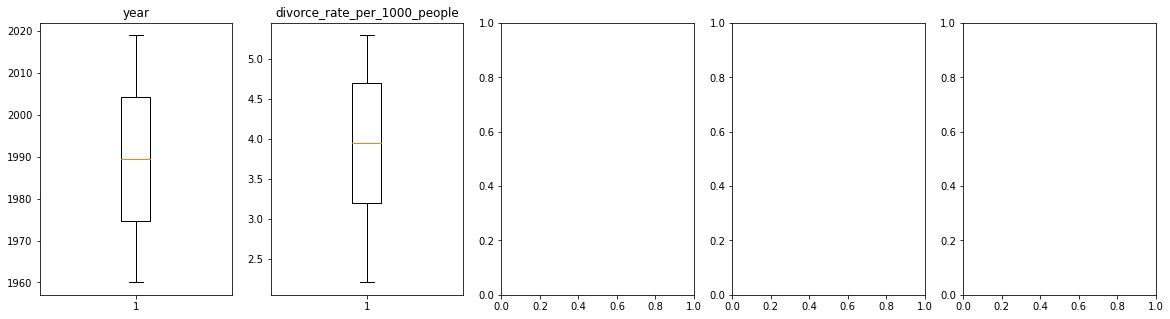

In [18]:
boxplots(divorce_df)

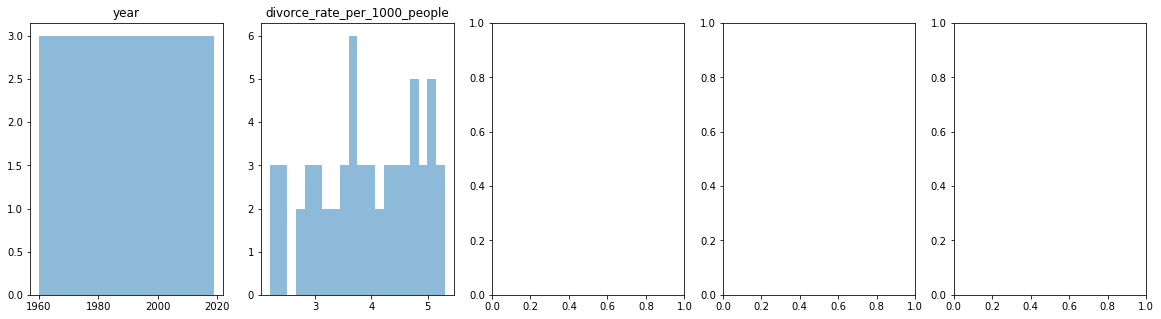

In [19]:
histograms(divorce_df)

## Merge divorce rate.  Matchin on "year" only will assign the same rate to each state

In [20]:
dataset_df = pd.merge(dataset_df, divorce_df, how='left',
                      left_on='year', right_on='year')


In [21]:
qc_data(dataset_df)

---  DTYPES  ---
year                              int64
state                            object
population_million              float64
education_million               float64
welfare_million                 float64
crime_rate                      float64
unemployment_rate               float64
divorce_rate_per_1000_people    float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million  \
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03   
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03   
std      16.454726           37.865413       1.032112e+05     6.274371e+04   
min    1970.000000            0.303000       1.199000e+02     1.280000e+01   
25%    1984.000000            1.570750       1.931550e+03     5.900000e+02   
50%    1998.000000            3.821500       4.919800e+03     1.313950e+03   
75%    2012.000000            6.632750       1.372025e+04     3.561275e+03   
max 

## Load homeownership rate

In [22]:
# Load crime data
path = "../Raw_Data/"
filename = "homeownership_rate.csv"
path_filename = path + filename

homeownership_df= pd.read_csv(path_filename, delimiter=",")
homeownership_df

,homeownership_rate,state,year
0,7.79,National,1976
1,7.13,National,1977
2,6.13,National,1978
3,5.92,National,1979
4,7.26,National,1980
...,...,...,...
1927,65.70,North Carolina,2016
1928,66.30,North Carolina,2017
1929,65.20,North Carolina,2018
1930,65.10,North Carolina,2019


In [23]:
# QC check 
qc_data(homeownership_df)

---  DTYPES  ---
homeownership_rate    float64
state                  object
year                    int64
dtype: object
---  STATISTICS  ---
       homeownership_rate         year
count         1932.000000  1932.000000
mean            65.881967  2001.906832
std             11.221562    10.756262
min              3.720000  1976.000000
25%             64.600000  1993.000000
50%             68.400000  2002.000000
75%             71.200000  2011.000000
max             81.300000  2020.000000
---  TOTAL NAs  ---
homeownership_rate    0
state                 0
year                  0
dtype: int64
---  YEARS COVERED  ---
Start: 1976
End: 2020
---  LIST OF STATES  ---
Number states: 52
Alabama                 37
Alaska                  37
Arizona                 37
Arkansas                37
California              37
Colorado                37
Connecticut             37
Delaware                37
District of Columbia    37
Florida                 37
Georgia                 37
Hawaii          

In [24]:
homeownership_df.loc[homeownership_df.state=='New York'].describe()

,homeownership_rate,year
count,37.000000,37.000000
mean,53.032432,2002.000000
std,1.464782,10.824355
min,50.300000,1984.000000
25%,52.000000,1993.000000
50%,52.800000,2002.000000
75%,53.900000,2011.000000
max,55.900000,2020.000000


In [25]:
homeownership_df.loc[homeownership_df.state=='National'].describe()

,homeownership_rate,year
count,45.000000,45.000000
mean,6.366667,1998.000000
std,1.649472,13.133926
min,3.720000,1976.000000
25%,5.140000,1987.000000
50%,6.060000,1998.000000
75%,7.490000,2009.000000
max,9.860000,2020.000000


## Merge homeownership

In [26]:
dataset_df = pd.merge(dataset_df, homeownership_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])

In [27]:
qc_data(dataset_df)

---  DTYPES  ---
year                              int64
state                            object
population_million              float64
education_million               float64
welfare_million                 float64
crime_rate                      float64
unemployment_rate               float64
divorce_rate_per_1000_people    float64
homeownership_rate              float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million  \
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03   
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03   
std      16.454726           37.865413       1.032112e+05     6.274371e+04   
min    1970.000000            0.303000       1.199000e+02     1.280000e+01   
25%    1984.000000            1.570750       1.931550e+03     5.900000e+02   
50%    1998.000000            3.821500       4.919800e+03     1.313950e+03   
75%    2012.000000            6.632750    

## Load Minimum_Wage.csv

In [28]:
# Load crime data
path = "../Raw_Data/"
filename = "minimum_wage_effective_1968-2020.csv"
path_filename = path + filename

min_wage_df= pd.read_csv(path_filename, delimiter=",")
min_wage_df

,year,state,minimum_wage_effective,minimum_wage_2020_nominal,CPI_Average
0,1968,Alabama,1.15,8.55,34.801
1,1968,Alaska,2.10,15.61,34.800
2,1968,Arizona,1.15,8.55,34.800
3,1968,Arkansas,1.15,8.55,34.800
4,1968,California,1.65,12.26,34.800
...,...,...,...,...,...
2857,2020,Virginia,7.25,7.25,258.660
2858,2020,Washington,13.50,13.50,258.660
2859,2020,West Virginia,8.75,8.75,258.660
2860,2020,Wisconsin,7.25,7.25,258.660


In [29]:
qc_data(min_wage_df)

---  DTYPES  ---
year                           int64
state                         object
minimum_wage_effective       float64
minimum_wage_2020_nominal    float64
CPI_Average                  float64
dtype: object
---  STATISTICS  ---
              year  minimum_wage_effective  minimum_wage_2020_nominal  \
count  2862.000000             2862.000000                2862.000000   
mean   1994.000000                4.624333                   8.360758   
std      15.299732                2.324131                   1.128870   
min    1968.000000                1.150000                   6.420000   
25%    1981.000000                3.350000                   7.610000   
50%    1994.000000                4.250000                   8.170000   
75%    2007.000000                6.550000                   8.980000   
max    2020.000000               14.000000                  15.610000   

       CPI_Average  
count  2862.000000  
mean    145.417585  
std      69.361536  
min      34.800000  


In [30]:
# Find additional state in min_wage
state_list = min_wage_df['state'].unique().tolist()
for i in dataset_df['state'].unique().tolist():
    if i in state_list:
        state_list.remove(i)
state_list

['Guam', 'Puerto Rico', 'U.S. Virgin Islands']

In [31]:
# Find missing state in min_wage
state_list = dataset_df['state'].unique().tolist()
for i in min_wage_df['state'].unique().tolist():
    if i in state_list:
        state_list.remove(i)
state_list

['National']

In [32]:
## Drop Guam, Puerto Rico and US Virgin Islands
min_wage_df = min_wage_df.drop(min_wage_df[min_wage_df['state']
                            .isin(['Guam', 'Puerto Rico', 'U.S. Virgin Islands'])].index)

In [33]:
## Remove data before 1970 and nominal value column
min_wage_df = min_wage_df.drop(min_wage_df[min_wage_df.year< 1970].index)
min_wage_df = min_wage_df.drop(columns='minimum_wage_2020_nominal')

In [34]:
# national min_wage is the average of the states' average
national_min_df = min_wage_df.groupby('year', as_index=False).mean()
national_min_df['state'] = 'National'
national_min_df.describe()

,year,minimum_wage_effective,CPI_Average
count,51.000000,51.000000,51.000000
mean,1995.000000,4.766336,149.718275
std,14.866069,2.218463,67.807972
min,1970.000000,1.382353,38.800000
25%,1982.500000,3.360196,98.050000
50%,1995.000000,4.317059,152.400000
75%,2007.500000,6.358039,210.939500
max,2020.000000,9.103137,258.660000


In [35]:
min_wage_df = pd.concat([min_wage_df,national_min_df], ignore_index=True)
qc_data(min_wage_df)

---  DTYPES  ---
year                        int64
state                      object
minimum_wage_effective    float64
CPI_Average               float64
dtype: object
---  STATISTICS  ---
              year  minimum_wage_effective  CPI_Average
count  2652.000000             2652.000000  2652.000000
mean   1995.000000                4.766336   149.718275
std      14.722377                2.280135    67.152559
min    1970.000000                1.300000    38.800000
25%    1982.000000                3.350000    96.500000
50%    1995.000000                4.250000   152.400000
75%    2008.000000                6.750000   214.537000
max    2020.000000               14.000000   258.660000
---  TOTAL NAs  ---
year                      0
state                     0
minimum_wage_effective    0
CPI_Average               0
dtype: int64
---  YEARS COVERED  ---
Start: 1970
End: 2020
---  LIST OF STATES  ---
Number states: 52
Alabama                 51
Alaska                  51
Arizona             

## Merge Minimum wage data

In [36]:
dataset_df = pd.merge(dataset_df, min_wage_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])
qc_data(dataset_df)

---  DTYPES  ---
year                              int64
state                            object
population_million              float64
education_million               float64
welfare_million                 float64
crime_rate                      float64
unemployment_rate               float64
divorce_rate_per_1000_people    float64
homeownership_rate              float64
minimum_wage_effective          float64
CPI_Average                     float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million  \
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03   
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03   
std      16.454726           37.865413       1.032112e+05     6.274371e+04   
min    1970.000000            0.303000       1.199000e+02     1.280000e+01   
25%    1984.000000            1.570750       1.931550e+03     5.900000e+02   
50%    1998.000000            3.821500  

## Load Inflation_rate

In [37]:
# Load inflation rate
path = "../Raw_Data/"
filename = "CPI_inflation_rate_yearly_1984base.csv"
path_filename = path + filename

inflation_df= pd.read_csv(path_filename, delimiter=",")
inflation_df.columns = ['year','CPI','inflation_rate']
#inflation_df.inflation_rate = inflation_df.inflation_rate.astype(np.float64)
# Keep CPI from previous dataset
inflation_df = inflation_df.drop(columns=['CPI'])
inflation_df

,year,inflation_rate
0,1970,5.8
1,1971,4.3
2,1972,3.3
3,1973,6.2
4,1974,11.1
5,1975,9.1
6,1976,5.7
7,1977,6.5
8,1978,7.6
9,1979,11.3


In [38]:
qc_data(inflation_df)

---  DTYPES  ---
year                int64
inflation_rate    float64
dtype: object
---  STATISTICS  ---
              year  inflation_rate
count    52.000000       52.000000
mean   1995.500000        3.955769
std      15.154757        2.866672
min    1970.000000       -0.400000
25%    1982.750000        2.175000
50%    1995.500000        3.200000
75%    2008.250000        4.800000
max    2021.000000       13.500000
---  TOTAL NAs  ---
year              0
inflation_rate    0
dtype: int64
---  YEARS COVERED  ---
Start: 1970
End: 2021


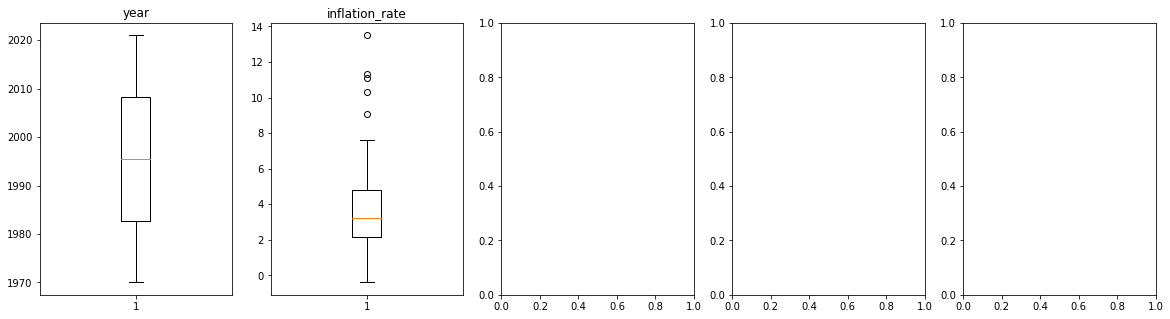

In [39]:
boxplots(inflation_df)

In [40]:
dataset_df = pd.merge(dataset_df, inflation_df, how='left',
                      left_on='year', right_on='year')

In [41]:
qc_data(dataset_df)

---  DTYPES  ---
year                              int64
state                            object
population_million              float64
education_million               float64
welfare_million                 float64
crime_rate                      float64
unemployment_rate               float64
divorce_rate_per_1000_people    float64
homeownership_rate              float64
minimum_wage_effective          float64
CPI_Average                     float64
inflation_rate                  float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million  \
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03   
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03   
std      16.454726           37.865413       1.032112e+05     6.274371e+04   
min    1970.000000            0.303000       1.199000e+02     1.280000e+01   
25%    1984.000000            1.570750       1.931550e+03     5.900000e+02   


## Load average_wage_indexing

In [42]:
# Load awi
path = "../Raw_Data/"
filename = "average_wage_indexing_1951-2020.csv"
path_filename = path + filename

awi_df= pd.read_csv(path_filename, delimiter=",")
awi_df

,Year,AWI,Annual_change
0,1951,"2,799.16",0
1,1952,"2,973.32",6.22%
2,1953,"3,139.44",5.59%
3,1954,"3,155.64",0.52%
4,1955,"3,301.44",4.62%
...,...,...,...
65,2016,"48,642.15",1.13%
66,2017,"50,321.89",3.45%
67,2018,"52,145.80",3.62%
68,2019,"54,099.99",3.75%


In [43]:
# Drop unnecessary columns and rows
awi_df = awi_df.drop(columns='Annual_change')
awi_df = awi_df.drop(awi_df[awi_df.Year<1970].index, axis=0)

awi_df.columns = ['year','avg_wage_index']
qc_data(awi_df)

---  DTYPES  ---
year               int64
avg_wage_index    object
dtype: object
---  STATISTICS  ---
              year
count    51.000000
mean   1995.000000
std      14.866069
min    1970.000000
25%    1982.500000
50%    1995.000000
75%    2007.500000
max    2020.000000
---  TOTAL NAs  ---
year              0
avg_wage_index    0
dtype: int64
---  YEARS COVERED  ---
Start: 1970
End: 2020


In [44]:
awi_df.avg_wage_index = awi_df.avg_wage_index.str.replace(',','').astype(np.float64)
awi_df.dtypes

year                int64
avg_wage_index    float64
dtype: object

## Merge AWI dataframe

In [45]:
dataset_df = pd.merge(dataset_df, awi_df, how='left', 
                      left_on='year', right_on='year')
qc_data(dataset_df)

---  DTYPES  ---
year                              int64
state                            object
population_million              float64
education_million               float64
welfare_million                 float64
crime_rate                      float64
unemployment_rate               float64
divorce_rate_per_1000_people    float64
homeownership_rate              float64
minimum_wage_effective          float64
CPI_Average                     float64
inflation_rate                  float64
avg_wage_index                  float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million  \
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03   
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03   
std      16.454726           37.865413       1.032112e+05     6.274371e+04   
min    1970.000000            0.303000       1.199000e+02     1.280000e+01   
25%    1984.000000            1.570750

## Load poverty_rates.csv

In [46]:
# Load poverty rates
path = "../Raw_Data/"
filename = "poverty_rates_1967-2014.csv"
path_filename = path + filename

poverty_rate_df= pd.read_csv(path_filename, delimiter=",")
poverty_rate_df = poverty_rate_df.drop(poverty_rate_df[poverty_rate_df.year<1970].index)
poverty_rate_df

,year,poverty_rate,state
33,1970,19.9,California
34,1970,26.4,Florida
35,1970,16.8,Ohio
36,1970,26.8,Texas
37,1970,16.9,Indiana
...,...,...,...
2338,2018,10.7,Virginia
2339,2018,10.3,Washington
2340,2018,17.4,West Virginia
2341,2018,11.1,Wisconsin


In [47]:
qc_data(poverty_rate_df)

---  DTYPES  ---
year              int64
poverty_rate    float64
state            object
dtype: object
---  STATISTICS  ---
              year  poverty_rate
count  2310.000000   2310.000000
mean   1996.785714     15.697909
std      13.196534      4.574980
min    1970.000000      7.300000
25%    1986.000000     12.322500
50%    1997.000000     15.000000
75%    2008.000000     18.075000
max    2019.000000     33.590000
---  TOTAL NAs  ---
year            0
poverty_rate    0
state           0
dtype: int64
---  YEARS COVERED  ---
Start: 1970
End: 2019
---  LIST OF STATES  ---
Number states: 51
Alabama           44
Alaska            44
Arizona           44
Arkansas          44
California        50
Colorado          44
Connecticut       50
Delaware          44
Florida           50
Georgia           44
Hawaii            44
Idaho             44
Illinois          50
Indiana           50
Iowa              44
Kansas            44
Kentucky          44
Louisiana         44
Maine             44
Mary

In [48]:
# Find missing state in poverty_rate
state_list = dataset_df['state'].unique().tolist()
for i in poverty_rate_df['state'].unique().tolist():
    if i in state_list:
        state_list.remove(i)
state_list

['District of Columbia']

## Merge Poverty_rate

In [49]:
dataset_df = pd.merge(dataset_df, poverty_rate_df, how='outer', 
                      left_on=['year','state'], right_on=['year','state'])

In [50]:
qc_data(dataset_df)

---  DTYPES  ---
year                              int64
state                            object
population_million              float64
education_million               float64
welfare_million                 float64
crime_rate                      float64
unemployment_rate               float64
divorce_rate_per_1000_people    float64
homeownership_rate              float64
minimum_wage_effective          float64
CPI_Average                     float64
inflation_rate                  float64
avg_wage_index                  float64
poverty_rate                    float64
dtype: object
---  STATISTICS  ---
              year  population_million  education_million  welfare_million  \
count  2964.000000         2964.000000       2.964000e+03     2.964000e+03   
mean   1998.000000           10.594938       2.225726e+04     9.389528e+03   
std      16.454726           37.865413       1.032112e+05     6.274371e+04   
min    1970.000000            0.303000       1.199000e+02     1.280000e+01  

## Store into a csv,  drop the index when saving

In [51]:
dataset_df.to_csv('../Raw_Data/dataset.csv', index = False, index_label=False)

In [52]:
dataset_df.loc[dataset_df.state=='Ohio']

,year,state,population_million,education_million,welfare_million,crime_rate,unemployment_rate,divorce_rate_per_1000_people,homeownership_rate,minimum_wage_effective,CPI_Average,inflation_rate,avg_wage_index,poverty_rate
2052,1970,Ohio,10.657,2380.6,477.4,284.3,NaN,3.5000,NaN,1.30,38.800,5.8,6186.24,16.8
2053,1971,Ohio,10.671,2622.7,653.3,298.4,NaN,3.7500,NaN,1.30,40.500,4.3,6497.08,15.8
2054,1972,Ohio,10.685,2921.8,878.8,299.4,NaN,4.0000,NaN,1.60,41.800,3.3,7133.80,15.2
2055,1973,Ohio,10.699,3157.5,759.9,291.7,NaN,4.2500,NaN,1.60,44.400,6.2,7580.16,14.8
2056,1974,Ohio,10.713,3172.5,872.9,364.1,NaN,4.5000,NaN,1.60,49.300,11.1,8030.76,14.5
2057,1975,Ohio,10.727,3777.5,1228.1,408.0,NaN,4.7500,NaN,1.60,53.800,9.1,8630.92,14.7
2058,1976,Ohio,10.741,4444.6,1743.0,388.7,7.8,5.0000,NaN,2.20,56.900,5.7,9226.48,14.7
2059,1977,Ohio,10.755,4870.0,2445.8,406.7,6.5,5.1000,NaN,2.20,60.600,6.5,9779.44,14.6
2060,1978,Ohio,10.769,4955.1,2550.2,412.7,5.5,5.2000,NaN,2.20,65.200,7.6,10556.03,14.5
2061,1979,Ohio,10.784,5464.2,2659.7,457.5,5.9,5.3000,NaN,2.90,72.600,11.3,11479.46,14.7


In [53]:
dataset_na_dropped_df = dataset_df.dropna(how='any')

In [54]:
dataset_na_dropped_df

,year,state,population_million,education_million,welfare_million,crime_rate,unemployment_rate,divorce_rate_per_1000_people,homeownership_rate,minimum_wage_effective,CPI_Average,inflation_rate,avg_wage_index,poverty_rate
6,1976,National,216.945,107290.0,72155.2,467.8,7.786562,5.00,7.79,2.226667,56.900,5.7,9226.48,14.10
7,1977,National,219.307,115893.0,83417.8,475.9,7.132505,5.10,7.13,2.226667,60.600,6.5,9779.44,13.92
8,1978,National,221.694,128541.0,81037.9,497.8,6.134198,5.20,6.13,2.226667,65.200,7.6,10556.03,13.43
9,1979,National,224.107,140169.0,83691.3,548.9,5.923827,5.30,5.92,2.910000,72.600,11.3,11479.46,13.33
10,1980,National,226.546,153686.0,108251.7,596.6,7.255717,5.20,7.26,3.110196,82.400,13.5,12513.46,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,2015,Wyoming,0.586,2990.3,319.0,221.6,4.200000,3.10,69.90,7.250000,237.017,0.1,48098.63,10.60
2953,2016,Wyoming,0.585,3181.0,358.8,244.7,5.400000,3.01,70.20,7.250000,240.007,1.3,48642.15,10.90
2954,2017,Wyoming,0.580,3097.3,360.1,234.6,4.300000,2.90,70.40,7.250000,245.120,2.1,50321.89,10.80
2955,2018,Wyoming,0.579,2778.7,339.6,213.8,4.000000,2.90,71.10,7.250000,251.107,2.4,52145.80,10.70


In [55]:
dataset_na_dropped_df.to_csv('../Raw_Data/dataset_na_dropped.csv', index = False, index_label=False)